In [11]:
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn import metrics
import itertools

# ----設定繪圖-------
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False  
from matplotlib.font_manager import FontProperties 
import seaborn as sns

In [12]:
sum([10,2])

12

In [13]:
df_train = pd.read_csv("train after forward predict.csv", encoding = 'GB18030')
df_train = df_train.drop("Unnamed: 0", axis=1)
y_train = df_train["Y1"]
df_train = df_train.astype('float32')
df_train.head()

,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,L1YR_B_ISSUE_CNT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.008724,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.005359,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000603,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.000243,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.002600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_train['EDUCATION_CD'][3]

1.0

In [15]:
valid = pd.read_csv("vali after forward predict.csv", encoding = 'GB18030')
valid = valid.drop("Unnamed: 0", axis=1)
y_vali = valid["Y1"]
df_vali = valid.astype('float32')

df_vali.head()

,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,L1YR_B_ISSUE_CNT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.000174,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000182,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.017312,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig(title+'.png', dpi=300)

In [17]:
df_train = xgb.DMatrix(df_train.drop('Y1',axis = 1), label=df_train['Y1'])
df_vali = xgb.DMatrix(df_vali.drop('Y1',axis = 1), label=df_vali['Y1'])

In [40]:
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    #roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    #roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    return optimal_threshold #list(roc_t['threshold']) 

In [51]:
def logistic_obj(y_hat, dtrain):

    y = dtrain.get_label()
    p = y_hat 
    # p = 1. / (1. + np.exp(-y_hat)) # 用于避免hessian矩阵中很多0
    grad = p - y
    hess = p * (1. - p)
    #grad = 4 * p * y + p - 5* y
    #hess = (4 * y + 1) * (p * (1.0 - p))
    return grad, hess

def err_rate(y_hat, dtrain):
    y = dtrain.get_label()
    # y_hat = 1.0 / (1.0 + np.exp(-y_hat))
    y_hat = np.clip(y_hat, 10e-7, 1-10e-7)
    loss_fn = y * np.log(y_hat)
    loss_fp = (1.0 - y) * np.log(1.0 - y_hat)
    return 'error', np.sum( -(1 * loss_fn + loss_fp)) / len(y)

xgb_pars = {'min_child_weight':5, 'objective': 'reg:logistic', 'eta': 1e-3,
      'max_depth': 3, 'tree_method': 'hist', 'seed': 42,
    'min_child_weight':5, 'gamma':0.2,'colsample_bytree':0.7, 'subsample':0.7, 'reg_alpha':0.0677, 'reg_lambda':0.56,
           'eval_metric':'logloss','scale_pos_weights':50, 'max_delta_step':1}

model_trn = xgb.train(xgb_pars, df_train, 1000, evals=[(df_train, 'trn'), (df_vali, 'vld')], obj=logistic_obj, feval=err_rate
                     ,early_stopping_rounds=150)

[0]	trn-logloss:0.692488	vld-logloss:0.692749	trn-error:0.692668	vld-error:0.692667
Multiple eval metrics have been passed: 'vld-error' will be used for early stopping.

Will train until vld-error hasn't improved in 150 rounds.
[1]	trn-logloss:0.691766	vld-logloss:0.692167	trn-error:0.692189	vld-error:0.692187
[2]	trn-logloss:0.691499	vld-logloss:0.691516	trn-error:0.691709	vld-error:0.691707
[3]	trn-logloss:0.691424	vld-logloss:0.691338	trn-error:0.69123	vld-error:0.691227
[4]	trn-logloss:0.691184	vld-logloss:0.690773	trn-error:0.690752	vld-error:0.690747
[5]	trn-logloss:0.690458	vld-logloss:0.690194	trn-error:0.690273	vld-error:0.690268
[6]	trn-logloss:0.690229	vld-logloss:0.689637	trn-error:0.689796	vld-error:0.68979
[7]	trn-logloss:0.688924	vld-logloss:0.689459	trn-error:0.689318	vld-error:0.689311
[8]	trn-logloss:0.688703	vld-logloss:0.688887	trn-error:0.68884	vld-error:0.688833
[9]	trn-logloss:0.687978	vld-logloss:0.688313	trn-error:0.688363	vld-error:0.688354
[10]	trn-logloss:0.

[96]	trn-logloss:0.647623	vld-logloss:0.647711	trn-error:0.647792	vld-error:0.647706
[97]	trn-logloss:0.646864	vld-logloss:0.647219	trn-error:0.647336	vld-error:0.64725
[98]	trn-logloss:0.64661	vld-logloss:0.646628	trn-error:0.646881	vld-error:0.646794
[99]	trn-logloss:0.646549	vld-logloss:0.646429	trn-error:0.646426	vld-error:0.646338
[100]	trn-logloss:0.646303	vld-logloss:0.64586	trn-error:0.645972	vld-error:0.645883
[101]	trn-logloss:0.64554	vld-logloss:0.645372	trn-error:0.645517	vld-error:0.645427
[102]	trn-logloss:0.645284	vld-logloss:0.644779	trn-error:0.645064	vld-error:0.644972
[103]	trn-logloss:0.644154	vld-logloss:0.644581	trn-error:0.64461	vld-error:0.644518
[104]	trn-logloss:0.643898	vld-logloss:0.643986	trn-error:0.644156	vld-error:0.644063
[105]	trn-logloss:0.643137	vld-logloss:0.643507	trn-error:0.643703	vld-error:0.643609
[106]	trn-logloss:0.642899	vld-logloss:0.642912	trn-error:0.643249	vld-error:0.643155
[107]	trn-logloss:0.642819	vld-logloss:0.642723	trn-error:0.642

[192]	trn-logloss:0.605406	vld-logloss:0.605137	trn-error:0.605213	vld-error:0.605043
[193]	trn-logloss:0.605177	vld-logloss:0.604614	trn-error:0.604781	vld-error:0.60461
[194]	trn-logloss:0.604364	vld-logloss:0.604221	trn-error:0.60435	vld-error:0.604178
[195]	trn-logloss:0.604107	vld-logloss:0.603597	trn-error:0.603919	vld-error:0.603746
[196]	trn-logloss:0.603173	vld-logloss:0.603422	trn-error:0.603488	vld-error:0.603314
[197]	trn-logloss:0.602899	vld-logloss:0.602778	trn-error:0.603058	vld-error:0.602883
[198]	trn-logloss:0.602075	vld-logloss:0.602404	trn-error:0.602627	vld-error:0.602452
[199]	trn-logloss:0.601816	vld-logloss:0.601764	trn-error:0.602197	vld-error:0.602021
[200]	trn-logloss:0.601732	vld-logloss:0.601562	trn-error:0.601768	vld-error:0.60159
[201]	trn-logloss:0.601663	vld-logloss:0.601356	trn-error:0.601338	vld-error:0.60116
[202]	trn-logloss:0.601387	vld-logloss:0.60072	trn-error:0.600909	vld-error:0.60073
[203]	trn-logloss:0.600581	vld-logloss:0.600374	trn-error:0.

[288]	trn-logloss:0.564558	vld-logloss:0.564438	trn-error:0.564915	vld-error:0.56466
[289]	trn-logloss:0.564467	vld-logloss:0.564223	trn-error:0.564507	vld-error:0.564251
[290]	trn-logloss:0.564396	vld-logloss:0.564015	trn-error:0.5641	vld-error:0.563842
[291]	trn-logloss:0.564124	vld-logloss:0.563357	trn-error:0.563692	vld-error:0.563434
[292]	trn-logloss:0.563242	vld-logloss:0.563092	trn-error:0.563285	vld-error:0.563026
[293]	trn-logloss:0.563013	vld-logloss:0.562525	trn-error:0.562879	vld-error:0.562618
[294]	trn-logloss:0.562284	vld-logloss:0.562317	trn-error:0.562472	vld-error:0.562211
[295]	trn-logloss:0.562001	vld-logloss:0.561667	trn-error:0.562065	vld-error:0.561804
[296]	trn-logloss:0.561135	vld-logloss:0.561398	trn-error:0.561659	vld-error:0.561397
[297]	trn-logloss:0.561045	vld-logloss:0.561184	trn-error:0.561253	vld-error:0.56099
[298]	trn-logloss:0.560764	vld-logloss:0.560502	trn-error:0.560848	vld-error:0.560583
[299]	trn-logloss:0.560685	vld-logloss:0.560314	trn-error:

[384]	trn-logloss:0.527228	vld-logloss:0.526744	trn-error:0.526873	vld-error:0.526531
[385]	trn-logloss:0.526922	vld-logloss:0.526055	trn-error:0.526488	vld-error:0.526146
[386]	trn-logloss:0.525993	vld-logloss:0.525864	trn-error:0.526104	vld-error:0.525761
[387]	trn-logloss:0.525745	vld-logloss:0.525304	trn-error:0.52572	vld-error:0.525376
[388]	trn-logloss:0.525237	vld-logloss:0.525073	trn-error:0.525336	vld-error:0.524991
[389]	trn-logloss:0.524938	vld-logloss:0.524425	trn-error:0.524953	vld-error:0.524607
[390]	trn-logloss:0.52486	vld-logloss:0.524186	trn-error:0.524569	vld-error:0.524222
[391]	trn-logloss:0.523924	vld-logloss:0.523962	trn-error:0.524186	vld-error:0.523838
[392]	trn-logloss:0.523623	vld-logloss:0.523315	trn-error:0.523803	vld-error:0.523454
[393]	trn-logloss:0.523599	vld-logloss:0.523203	trn-error:0.523421	vld-error:0.523071
[394]	trn-logloss:0.523295	vld-logloss:0.522556	trn-error:0.523038	vld-error:0.522687
[395]	trn-logloss:0.522347	vld-logloss:0.522324	trn-erro

[480]	trn-logloss:0.490687	vld-logloss:0.490718	trn-error:0.491051	vld-error:0.490623
[481]	trn-logloss:0.490366	vld-logloss:0.490091	trn-error:0.490689	vld-error:0.490261
[482]	trn-logloss:0.490267	vld-logloss:0.489853	trn-error:0.490328	vld-error:0.489898
[483]	trn-logloss:0.490199	vld-logloss:0.489633	trn-error:0.489967	vld-error:0.489536
[484]	trn-logloss:0.489919	vld-logloss:0.489111	trn-error:0.489606	vld-error:0.489175
[485]	trn-logloss:0.48892	vld-logloss:0.488904	trn-error:0.489245	vld-error:0.488813
[486]	trn-logloss:0.48884	vld-logloss:0.488657	trn-error:0.488884	vld-error:0.488452
[487]	trn-logloss:0.488503	vld-logloss:0.488001	trn-error:0.488524	vld-error:0.48809
[488]	trn-logloss:0.488263	vld-logloss:0.487787	trn-error:0.488164	vld-error:0.48773
[489]	trn-logloss:0.488001	vld-logloss:0.487265	trn-error:0.487805	vld-error:0.487369
[490]	trn-logloss:0.487004	vld-logloss:0.487059	trn-error:0.487445	vld-error:0.487008
[491]	trn-logloss:0.486902	vld-logloss:0.486804	trn-error:

[576]	trn-logloss:0.457142	vld-logloss:0.456779	trn-error:0.457403	vld-error:0.456889
[577]	trn-logloss:0.457038	vld-logloss:0.456524	trn-error:0.457064	vld-error:0.45655
[578]	trn-logloss:0.456947	vld-logloss:0.456306	trn-error:0.456725	vld-error:0.456209
[579]	trn-logloss:0.456666	vld-logloss:0.455809	trn-error:0.456386	vld-error:0.45587
[580]	trn-logloss:0.455655	vld-logloss:0.455589	trn-error:0.456047	vld-error:0.45553
[581]	trn-logloss:0.455547	vld-logloss:0.455332	trn-error:0.455709	vld-error:0.455191
[582]	trn-logloss:0.455223	vld-logloss:0.454734	trn-error:0.455371	vld-error:0.454852
[583]	trn-logloss:0.455178	vld-logloss:0.454624	trn-error:0.455033	vld-error:0.454513
[584]	trn-logloss:0.45483	vld-logloss:0.454019	trn-error:0.454696	vld-error:0.454175
[585]	trn-logloss:0.454744	vld-logloss:0.453761	trn-error:0.454358	vld-error:0.453836
[586]	trn-logloss:0.453735	vld-logloss:0.453543	trn-error:0.454021	vld-error:0.453499
[587]	trn-logloss:0.453432	vld-logloss:0.453049	trn-error:

[672]	trn-logloss:0.425776	vld-logloss:0.425179	trn-error:0.425877	vld-error:0.425277
[673]	trn-logloss:0.425743	vld-logloss:0.425099	trn-error:0.425559	vld-error:0.424959
[674]	trn-logloss:0.425373	vld-logloss:0.424527	trn-error:0.425242	vld-error:0.424641
[675]	trn-logloss:0.425281	vld-logloss:0.424256	trn-error:0.424925	vld-error:0.424323
[676]	trn-logloss:0.424337	vld-logloss:0.424022	trn-error:0.424608	vld-error:0.424005
[677]	trn-logloss:0.424031	vld-logloss:0.423605	trn-error:0.424292	vld-error:0.423688
[678]	trn-logloss:0.423935	vld-logloss:0.423327	trn-error:0.423976	vld-error:0.423371
[679]	trn-logloss:0.423841	vld-logloss:0.423099	trn-error:0.423659	vld-error:0.423054
[680]	trn-logloss:0.42352	vld-logloss:0.422644	trn-error:0.423344	vld-error:0.422737
[681]	trn-logloss:0.423439	vld-logloss:0.422404	trn-error:0.423028	vld-error:0.422421
[682]	trn-logloss:0.422498	vld-logloss:0.422168	trn-error:0.422712	vld-error:0.422104
[683]	trn-logloss:0.42218	vld-logloss:0.421721	trn-erro

[768]	trn-logloss:0.396455	vld-logloss:0.395763	trn-error:0.396411	vld-error:0.395727
[769]	trn-logloss:0.396351	vld-logloss:0.395512	trn-error:0.396115	vld-error:0.39543
[770]	trn-logloss:0.396011	vld-logloss:0.395094	trn-error:0.395819	vld-error:0.395133
[771]	trn-logloss:0.39516	vld-logloss:0.394853	trn-error:0.395524	vld-error:0.394836
[772]	trn-logloss:0.395053	vld-logloss:0.394596	trn-error:0.395228	vld-error:0.394539
[773]	trn-logloss:0.394717	vld-logloss:0.394187	trn-error:0.394932	vld-error:0.394243
[774]	trn-logloss:0.394627	vld-logloss:0.393935	trn-error:0.394637	vld-error:0.393947
[775]	trn-logloss:0.394525	vld-logloss:0.393691	trn-error:0.394342	vld-error:0.393651
[776]	trn-logloss:0.394199	vld-logloss:0.393273	trn-error:0.394047	vld-error:0.393356
[777]	trn-logloss:0.394094	vld-logloss:0.39302	trn-error:0.393753	vld-error:0.39306
[778]	trn-logloss:0.393229	vld-logloss:0.392776	trn-error:0.393458	vld-error:0.392765
[779]	trn-logloss:0.392918	vld-logloss:0.392399	trn-error:

[864]	trn-logloss:0.369074	vld-logloss:0.36826	trn-error:0.368942	vld-error:0.368172
[865]	trn-logloss:0.368961	vld-logloss:0.367989	trn-error:0.368666	vld-error:0.367895
[866]	trn-logloss:0.368559	vld-logloss:0.367491	trn-error:0.36839	vld-error:0.367619
[867]	trn-logloss:0.367844	vld-logloss:0.367398	trn-error:0.368115	vld-error:0.367343
[868]	trn-logloss:0.367713	vld-logloss:0.367091	trn-error:0.367839	vld-error:0.367066
[869]	trn-logloss:0.367384	vld-logloss:0.366768	trn-error:0.367564	vld-error:0.36679
[870]	trn-logloss:0.367274	vld-logloss:0.366501	trn-error:0.367289	vld-error:0.366515
[871]	trn-logloss:0.367168	vld-logloss:0.36624	trn-error:0.367014	vld-error:0.366239
[872]	trn-logloss:0.366832	vld-logloss:0.36591	trn-error:0.36674	vld-error:0.365964
[873]	trn-logloss:0.366709	vld-logloss:0.365604	trn-error:0.366466	vld-error:0.365689
[874]	trn-logloss:0.365999	vld-logloss:0.365512	trn-error:0.366192	vld-error:0.365414
[875]	trn-logloss:0.365899	vld-logloss:0.365252	trn-error:0.

[960]	trn-logloss:0.34357	vld-logloss:0.34255	trn-error:0.343392	vld-error:0.342545
[961]	trn-logloss:0.343208	vld-logloss:0.342275	trn-error:0.343136	vld-error:0.342292
[962]	trn-logloss:0.343086	vld-logloss:0.341952	trn-error:0.34288	vld-error:0.342035
[963]	trn-logloss:0.342459	vld-logloss:0.341861	trn-error:0.342624	vld-error:0.341778
[964]	trn-logloss:0.342339	vld-logloss:0.341576	trn-error:0.342368	vld-error:0.341521
[965]	trn-logloss:0.341987	vld-logloss:0.341298	trn-error:0.342112	vld-error:0.341265
[966]	trn-logloss:0.341872	vld-logloss:0.341023	trn-error:0.341857	vld-error:0.341009
[967]	trn-logloss:0.341758	vld-logloss:0.340749	trn-error:0.341602	vld-error:0.340753
[968]	trn-logloss:0.341404	vld-logloss:0.340467	trn-error:0.341347	vld-error:0.340499
[969]	trn-logloss:0.341284	vld-logloss:0.34019	trn-error:0.341092	vld-error:0.340243
[970]	trn-logloss:0.340655	vld-logloss:0.340047	trn-error:0.340838	vld-error:0.339988
[971]	trn-logloss:0.340541	vld-logloss:0.339773	trn-error:

In [52]:
y_pred = model_trn.predict(df_vali,ntree_limit=model_trn.best_ntree_limit)

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(valid["Y1"], y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.549843936801144

## 畫confusion matrix

In [54]:
valid['Ypred'] = y_pred
threshold = Find_Optimal_Cutoff(valid["Y1"], valid["Ypred"])
print(threshold)

valid["pred_01"] = np.nan
valid['pred_01'] = valid["Ypred"].map(lambda x: 1 if x > threshold else 0)

0.269492


In [55]:
cm = metrics.confusion_matrix(valid["Y1"], valid["pred_01"])
cm


array([[28820,   600],
       [  510,    70]])

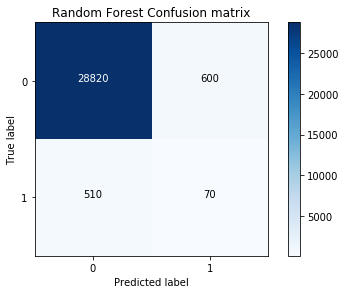

In [56]:
plot_confusion_matrix(cm, [0, 1], normalize=False, title='Random Forest Confusion matrix', cmap=plt.cm.Blues)